# Prediciting cuisine

### With MCA reduced dimensionality

In [57]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import graphviz
from dtreeviz.trees import dtreeviz # remember to load the package
np.random.seed(0)

In [2]:
df = pd.read_csv("Data/own_MCA.csv")
y = df["cuisine"]
X = df.drop(["cuisine", "Unnamed: 0", "ID"], axis=1)

In [18]:
model = RandomForestClassifier(n_estimators=50)

In [3]:
Xtrain, Xtest, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [19]:
model.fit(Xtrain, y_train)

RandomForestClassifier(n_estimators=50)

In [23]:
model.score(Xtest, y_test)

0.4406924556529173

### Hyperparameter tuning

In [4]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(10,80,10)]
# Number of features to consider at every split
max_features = ["sqrt"]
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the parameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': bootstrap
}

model = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=model, param_grid = param_grid, cv=5, verbose=2, n_jobs=4)


In [5]:
rf_grid.fit(Xtrain,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.5s

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [6]:
rf_grid.score(Xtest, y_test)

0.48685616584740327

### With sparse vectors (no MCA)

In [2]:
df = pd.read_csv("Data/own_reduced_merged2.csv")
y_data = df["cuisine"]
X_data = df.drop(["cuisine", "Unnamed: 0", "ID"], axis=1)

In [3]:
model = RandomForestClassifier(n_estimators=50)
Xtrain, Xtest, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=101)
model.fit(Xtrain, y_train)
model.score(Xtest, y_test)

0.715751228895063

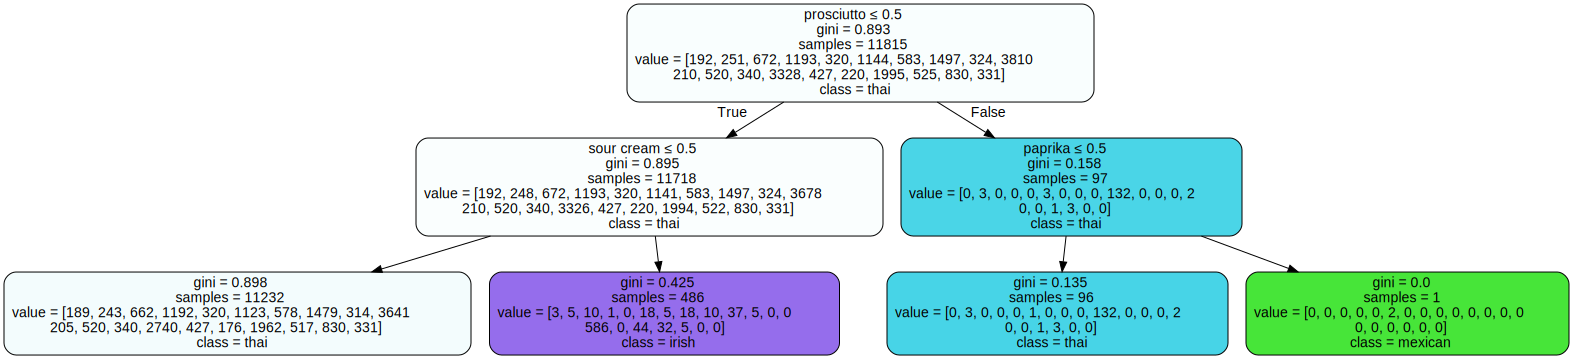

In [56]:
model2 = RandomForestClassifier(max_depth=2)
model2.fit(Xtrain, y_train)
dot_data = tree.export_graphviz(model2.estimators_[20], out_file=None,
                        feature_names=X_data.columns,  
                     class_names=y_data.unique(),  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(model2.estimators_[0],
#                feature_names = X_data.columns, 
#                class_names=y_data.unique(),
#                filled = True)

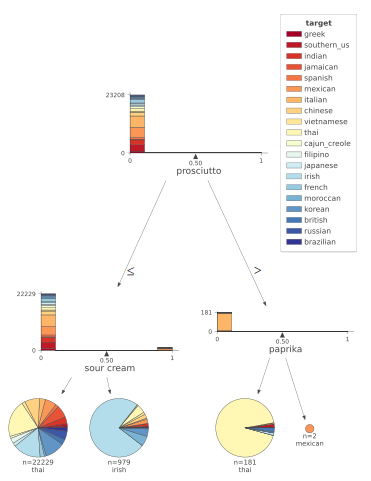

In [68]:
y_class_names = y_data.unique()
category_dict = {cont: id for id,cont in enumerate(y_class_names)}
y_int_data = df["cuisine"].replace(category_dict)

viz = dtreeviz(model2.estimators_[20], X_data, y_int_data,
                target_name="target",
                feature_names=X_data.columns,
                class_names=list(y_class_names))
viz


In [80]:
y_data[np.random.randint(0, len(X_data))]

'chinese'

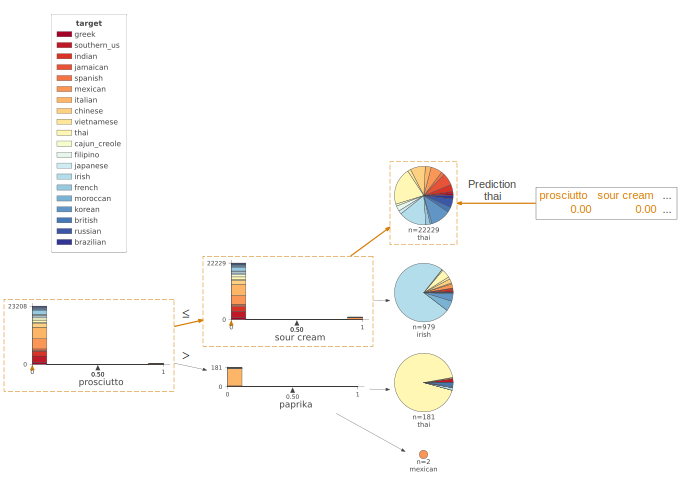

In [75]:

X_single = X_data.loc[np.random.randint(0, len(X_data)),:]  # random sample from training

viz = dtreeviz(model2.estimators_[20], X_data, y_int_data,
                target_name="target",
                feature_names=X_data.columns,
                class_names=list(y_class_names),
               orientation ='LR',  # left-right orientation
               X=X_single)  # need to give single observation for prediction
              
viz

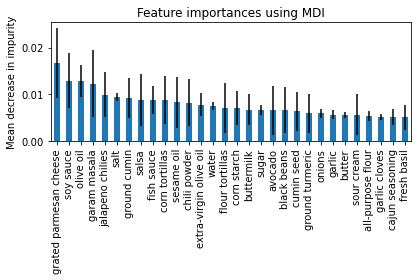

In [81]:
# variable importance MDI
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
df_importances = pd.DataFrame({"Importance": importances, "std": std}, index=X_data.columns).nlargest(30, columns="Importance")

fig, ax = plt.subplots()
df_importances["Importance"].plot.bar(yerr=df_importances["std"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
model = RandomForestClassifier(n_estimators=50)
Xtrain, Xtest, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=1)
model.fit(Xtrain, y_train)
model.score(Xtest, y_test)

0.7084847189570421

In [24]:
model = RandomForestClassifier()
Xtrain, Xtest, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=101)

rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, random_state=42, n_jobs=4)
rf_random.fit(Xtrain,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   random_state=42)

In [25]:
rf_random.score(Xtest, y_test)

0.3705920068390682

### Sparse vectors but all recipes

In [2]:
df = pd.read_csv("Data/own_reduced_merged2_with_all_recipes.csv")
y_data = df["cuisine"]
X_data = df.drop(["cuisine", "Unnamed: 0", "ID"], axis=1)

In [3]:
model = RandomForestClassifier(n_estimators=50)
Xtrain, Xtest, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=101)
model.fit(Xtrain, y_train)
model.score(Xtest, y_test)

0.704979879275654

: 